(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


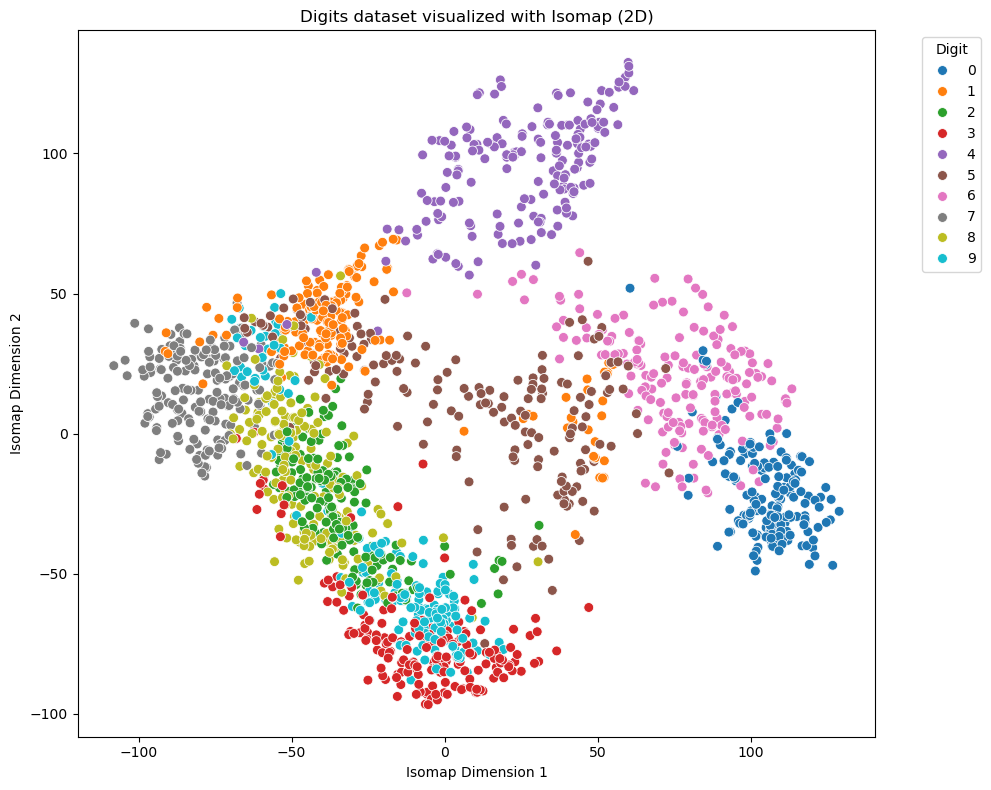

In [ ]:
from sklearn import datasets
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carica il dataset digits
digits = datasets.load_digits()
print(digits.images.shape)  # (1797, 8, 8)
print(digits.keys())        # dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

X = digits.data      # shape (1797, 64)
y = digits.target    # shape (1797,)

# 2. Applica Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_iso = isomap.fit_transform(X)

# 3. Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_iso[:, 0], y=X_iso[:, 1], hue=y, palette='tab10', s=50)
plt.title('Digits dataset visualized with Isomap (2D)')
plt.xlabel('Isomap Dimension 1')
plt.ylabel('Isomap Dimension 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Training accuracy: 1.0000
Validation accuracy: 0.9611


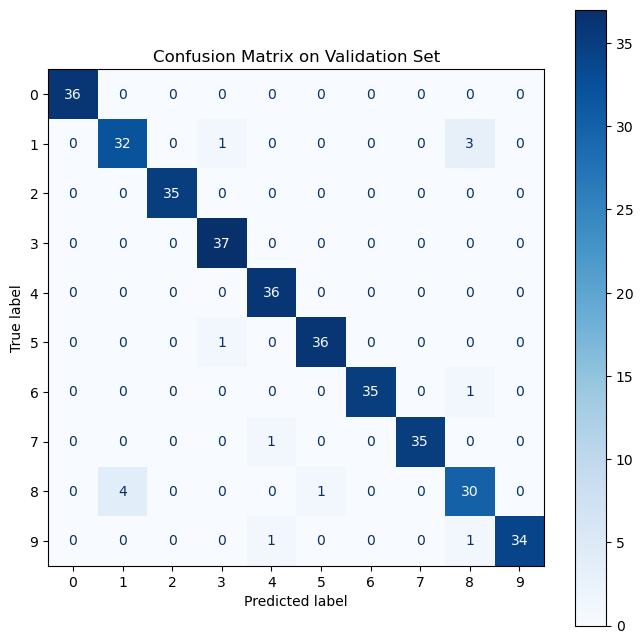

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Carica dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 2. Split del dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Modello Logistic Regression
model = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial')  # multi_class esplicito
model.fit(X_train, y_train)

# 4. Predizioni
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# 5. Accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)

print(f"Training accuracy: {acc_train:.4f}")
print(f"Validation accuracy: {acc_val:.4f}")

# 6. Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix on Validation Set")
plt.show()
